# MOST STREAMED SPOTIFY SONGS 2024

## Context
**Spotify** is a Swedish audio streaming and media service provider. It is one of the largest providers of music streaming services, with over *675 million monthly active users* comprising 263 million paying subscribers. Spotify's dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides extensive insights into each track's attributes, popularity, and presence on various music platforms, offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more.

## Goals of the EDA
	1.	Analyze Popularity Trends: Investigate the differences in popularity between top tracks based on Spotify streams and Spotify popularity. Understand the relationship between these two metrics and explore the correlation between Spotify streams and Spotify popularity.

	2.	Correlation Analysis: Explore how Spotify popularity correlates with other numerical metrics (such as streams, playlist reach, and engagement) to understand which metrics contribute the most to track popularity.

	3.	Artist Popularity Analysis: Examine the most popular artists on Spotify and identify any patterns in terms of their tracks’ popularity. Analyze how artists’ popularity is distributed across multiple tracks, and compare maximum popularity with total popularity across tracks.

	4.	Platform Comparison: Compare the performance of different music platforms (Spotify, Pandora, Soundcloud, YouTube, TikTok) by analyzing their streams, views, engagement metrics (likes, shares, etc.) and playlist reach. Understand which platforms have a stronger correlation with Spotify’s metrics.
	
	5.	Trend Analysis by Release Date: Explore the relationship between the release year of songs and their Spotify popularity, to identify whether older or newer songs have a greater impact on Spotify’s success.

	6.	Explicit vs Non-Explicit Songs: Analyze the popularity differences between explicit and non-explicit songs across metrics such as streams, engagement, and playlist reach.

	7.	Track Score vs Popularity: Assess the correlation between Track Score (presumably an internal ranking) and Spotify Popularity to determine if internal rankings have any significant impact on the songs’ external popularity.

These analyses aim to provide insights into how different factors contribute to the popularity of songs and artists, the effectiveness of different platforms, and the relationship between internal metrics (Track Score) and external success (Spotify Popularity).

### Importing the necessary packages

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Loading the dataset

In [124]:
spotify = pd.read_csv('./data/spotify.csv', encoding='latin1')

### Initial Data Examination
We review the first rows of the dataset to understand the structure and content.

In [125]:
spotify.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [126]:
spotify.shape


(4600, 29)

In [127]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

## DATA PREPROCESSING

### Dropping unnecessary columns
TIDAL column only contains missing values

In [128]:
spotify.drop("TIDAL Popularity",axis=1,inplace=True)
spotify.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

### Converting object columns to numeric columns

In [129]:
# List of columns to convert
cols_to_convert = ['All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
                   'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
                   'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins',
                   'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 
                   'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']

# Remove commas and convert to int
spotify[cols_to_convert] = spotify[cols_to_convert].replace(',', '', regex=True)

# Convert to numeric (coerce to avoid errors)
spotify[cols_to_convert] = spotify[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check data types
print(spotify.dtypes)

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Soundcloud Streams            float64
Shazam Count

### Missing Values Analysis

In [130]:
missing_values_count = spotify.isnull().sum()
print(missing_values_count)

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                   0
dtype: int64


### Identifying and removing duplicates

In [131]:
## Counting duplicates
num_duplicates = spotify.duplicated().sum()
print(num_duplicates)

2


In [132]:
# Dropping duplicates
spotify = spotify.drop_duplicates()
spotify.shape

(4598, 28)

## Data Analysis and Visualization

### TOP 10 SONGS

In [133]:
# Order by Spotify Streams
top_10_tracks = spotify.nlargest(10, 'Spotify Streams')[['Track', 'Spotify Streams']]
top_10_tracks

,Track,Spotify Streams
55,Blinding Lights,4.281469e+09
4254,Blinding Lights,4.261328e+09
53,Shape of You,3.909459e+09
1637,Shape of You,3.888356e+09
132,Someone You Loved,3.427499e+09
114,Sunflower - Spider-Man: Into the Spider-Verse,3.358704e+09
19,As It Was,3.301815e+09
3406,As It Was,3.299082e+09
262,Starboy,3.291262e+09
519,One Dance,3.192204e+09


Because we see there are songs repeated, we keep only one instance per Track Name.

In [134]:
spotify[spotify.duplicated(subset=['Track'], keep=False)]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,...,522042.0,4654.0,86.0,17167254.0,152.0,138529362.0,50982.0,9438601.0,4517131.0,1
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,...,17221.0,30.0,87.0,33245595.0,53.0,3372428.0,5762.0,NaN,6063523.0,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,ýýýýýýýýýýýý,ýýýýýýýýýýýý,Lamis Kan,7/27/2021,EGA252103733,4525,19.6,4.107109e+07,14309.0,1842678.0,...,789.0,NaN,1.0,74982.0,NaN,NaN,NaN,NaN,1266792.0,0
4539,Cake By The Ocean - Cover,YARIRAFI MEDLEY BEST30,MUSIC LAB JPN,3/29/2023,TCJPU2360314,4507,19.6,1.615456e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4570,You,You,Willy Paul,11/25/2022,QZW9K2296922,4546,19.5,3.302800e+05,174.0,8772.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184355.0,0
4586,Bodak Yellow,Pï¿½ï¿½bu (Camemicua,Serranow,11/30/2017,FR10S1809158,4556,19.5,8.402000e+03,4.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [135]:
spotify = spotify.drop_duplicates(subset=['Track'], keep='first')

Now we check again the top 10 tracks most streamed in Spotify.

In [136]:
top_10_tracks_streamed = spotify.nlargest(10, 'Spotify Streams')[['Track', 'Spotify Streams']]
top_10_tracks_streamed

,Track,Spotify Streams
55,Blinding Lights,4.281469e+09
53,Shape of You,3.909459e+09
132,Someone You Loved,3.427499e+09
114,Sunflower - Spider-Man: Into the Spider-Verse,3.358704e+09
19,As It Was,3.301815e+09
262,Starboy,3.291262e+09
519,One Dance,3.192204e+09
26,STAY (with Justin Bieber),3.107100e+09
39,Dance Monkey,3.071214e+09
118,Believer,3.006227e+09


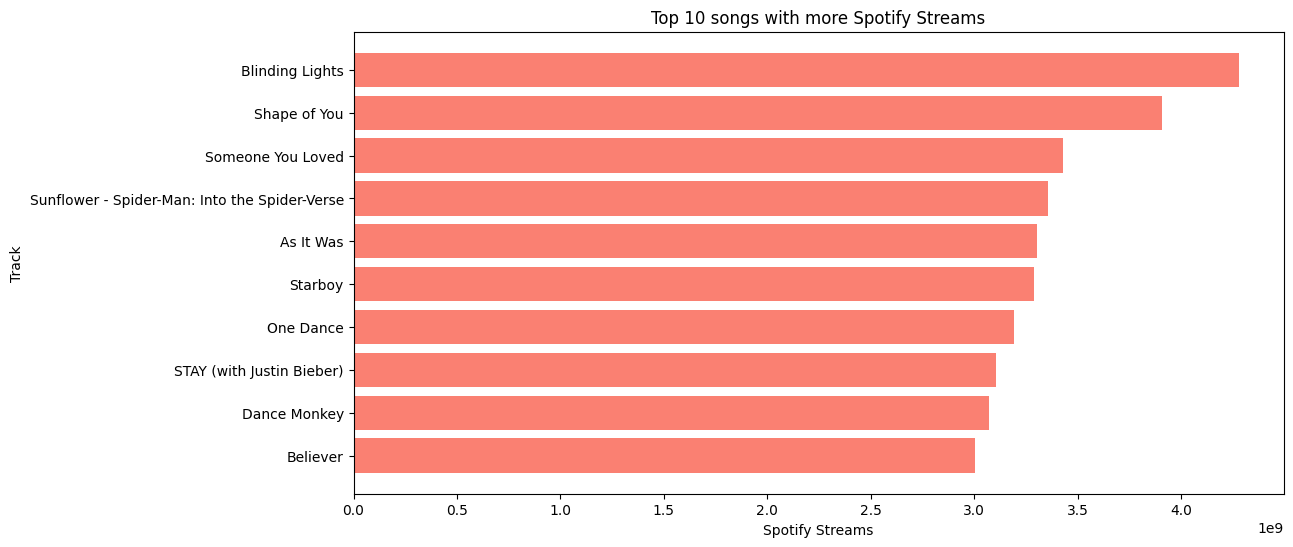

In [137]:
#Now we plot the top 10 tracks by Spotify Streams using a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_tracks_streamed['Track'], top_10_tracks_streamed['Spotify Streams'], color='salmon')
plt.xlabel("Spotify Streams")
plt.ylabel("Track")
plt.title("Top 10 songs with more Spotify Streams")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value on top
plt.show()

In [138]:
#We do the same analysis but using the Spotify Popularity column
top_10_tracks_popular = spotify.nlargest(10, 'Spotify Popularity')[['Track', 'Spotify Popularity']]
top_10_tracks_popular

,Track,Spotify Popularity
36,A Bar Song (Tipsy),96.0
21,Espresso,95.0
0,MILLION DOLLAR BABY,92.0
1,Not Like Us,92.0
2,i like the way you kiss me,92.0
7,Gata Only,92.0
12,LUNCH,92.0
40,BIRDS OF A FEATHER,92.0
10,I Had Some Help (feat. Morgan Wallen),91.0
78,CHIHIRO,90.0


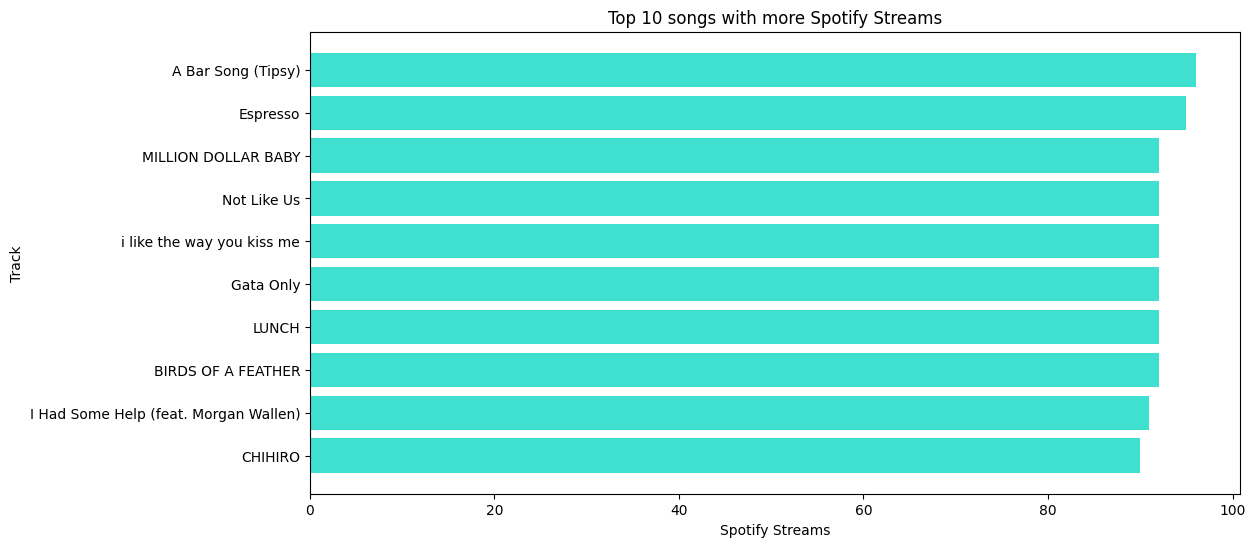

In [139]:
#Now we plot the top 10 tracks by Spotify Popularity using a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_tracks_popular['Track'],top_10_tracks_popular['Spotify Popularity'], color='turquoise')
plt.xlabel("Spotify Streams")
plt.ylabel("Track")
plt.title("Top 10 songs with more Spotify Streams")
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value on top
plt.show()

### Spotify Streams vs Spotify Popularity

In [140]:
#Now let's analyse the correlation between Spotify Streams and Spotify Popularity
correlation = spotify[['Spotify Streams', 'Spotify Popularity']].corr()
print(correlation)

                    Spotify Streams  Spotify Popularity
Spotify Streams            1.000000            0.380554
Spotify Popularity         0.380554            1.000000


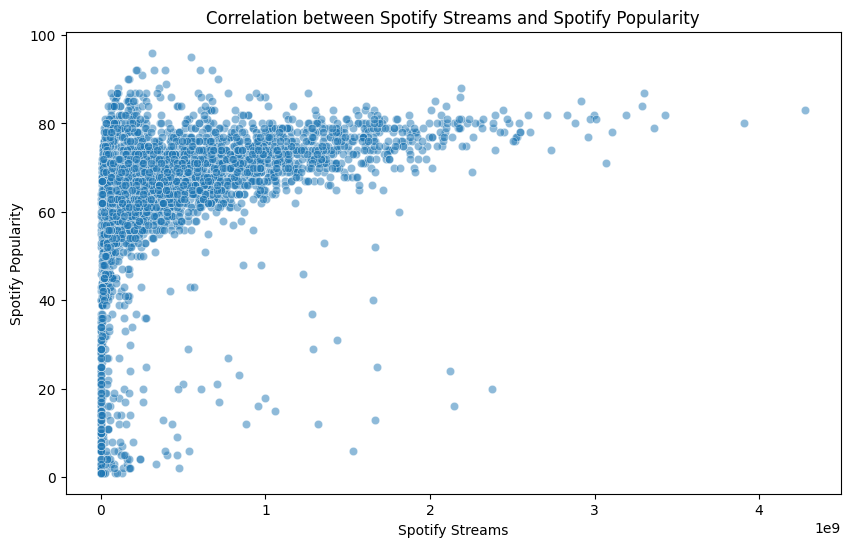

In [141]:
#Suprisingly, the correlation between Spotify Streams and Spotify Popularity is not that high. Let's plot it
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify, x='Spotify Streams', y='Spotify Popularity', alpha=0.5)
plt.title('Correlation between Spotify Streams and Spotify Popularity')
plt.xlabel('Spotify Streams')
plt.ylabel('Spotify Popularity')
plt.show()

### Spotify Popularity VS all other numeric columns

In [142]:
#Now let's analyse if there is positive correlation between Spotify Popularity and other columns that are numeric
# Select numeric columns
numeric_cols = spotify.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with Spotify Popularity
correlation = numeric_cols.corr()['Spotify Popularity'].sort_values(ascending=False)

# Show correlation
print(correlation)

Spotify Popularity            1.000000
Spotify Playlist Reach        0.475801
Spotify Playlist Count        0.385333
Spotify Streams               0.380554
Amazon Playlist Count         0.319542
Apple Music Playlist Count    0.296650
Shazam Counts                 0.248112
Deezer Playlist Count         0.238083
Deezer Playlist Reach         0.236156
Track Score                   0.193433
AirPlay Spins                 0.165312
Pandora Streams               0.157538
YouTube Playlist Reach        0.119705
YouTube Likes                 0.111066
Explicit Track                0.069302
Pandora Track Stations        0.057472
SiriusXM Spins                0.047233
YouTube Views                 0.037884
Soundcloud Streams           -0.012515
TikTok Likes                 -0.047313
TikTok Views                 -0.059892
TikTok Posts                 -0.182514
All Time Rank                -0.216348
Name: Spotify Popularity, dtype: float64


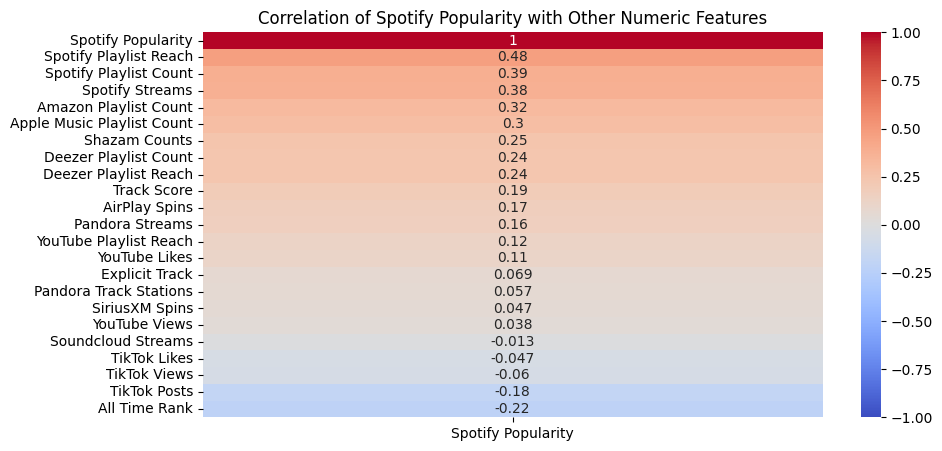

In [143]:
#Now let's plot it

plt.figure(figsize=(10, 5))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Spotify Popularity with Other Numeric Features')
plt.show()

### TOP 50 ARTISTS

In [144]:
# Now let's see the 50 most popular artists

top_50_artists= spotify.nlargest(10, 'Spotify Popularity')[['Artist', 'Spotify Popularity']]
top_50_artists

,Artist,Spotify Popularity
36,Shaboozey,96.0
21,Sabrina Carpenter,95.0
0,Tommy Richman,92.0
1,Kendrick Lamar,92.0
2,Artemas,92.0
7,FloyyMenor,92.0
12,Billie Eilish,92.0
40,Billie Eilish,92.0
10,Post Malone,91.0
78,Billie Eilish,90.0


We see that there are artists that appear twice. This is because they have more than one song in the dataset that is popular.


In [ ]:
# Instead, we can get the most popular song of each artist and then get the top 50 artists.

top_artists_max = (
    spotify.groupby("Artist")["Spotify Popularity"]
    .max()  
    .reset_index()
    .nlargest(50, "Spotify Popularity")
)

In [165]:
#Or, we can sum the popularity of all songs of each artist and then get the top 50 artists.
top_artists_sum = (
    spotify.groupby("Artist")["Spotify Popularity"]
    .sum()  
    .reset_index()
    .nlargest(50, "Spotify Popularity")
)

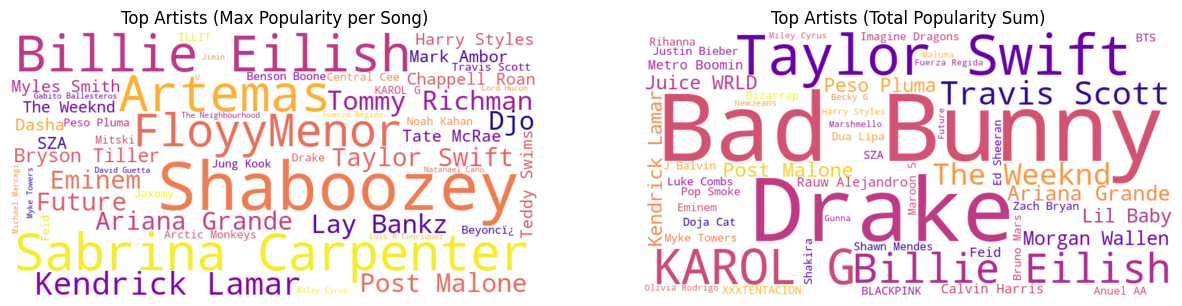

In [147]:
# Now let's compare the two methods using a WordCloud

# Create dictionaries for the Word Clouds
wordcloud_max = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate_from_frequencies(
    dict(zip(top_artists_max["Artist"], top_artists_max["Spotify Popularity"]))
)

wordcloud_sum = WordCloud(width=800, height=400, background_color="white",colormap="plasma").generate_from_frequencies(
    dict(zip(top_artists_sum["Artist"], top_artists_sum["Spotify Popularity"]))
)

# Create the figures
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(wordcloud_max, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Top Artists (Max Popularity per Song)")

axes[1].imshow(wordcloud_sum, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Top Artists (Total Popularity Sum)")

plt.show()

### Platform Comparison
Because we have different metrics, we need to compare platforms using the same metric.

STREAMS AND VIEWS

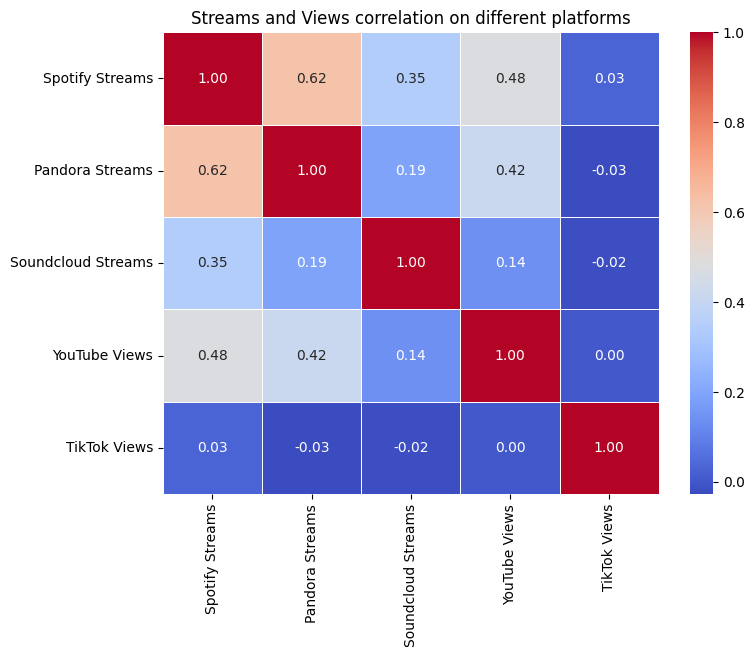

In [167]:
# Select the columns to analyze correlation
streams_and_views = ['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'YouTube Views', 'TikTok Views']

# Calculate the correlation between the selected columns
correlation_matrix = spotify[streams_and_views].corr()

# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Streams and Views correlation on different platforms")
plt.show()

ENGAGEMENT

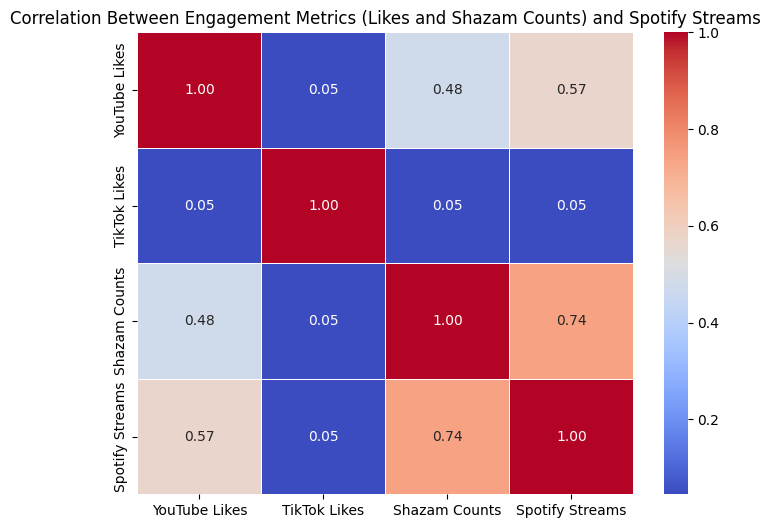

In [170]:
# Select the columns related to engagement metrics
engagement_columns = ['YouTube Likes', 'TikTok Likes', 'Shazam Counts','Spotify Streams']

# Calculate the correlation between these columns
engagement_correlation_matrix = spotify[engagement_columns].corr()

# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(engagement_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Engagement Metrics (Likes and Shazam Counts) and Spotify Streams")
plt.show()

PLAYLIST REACH

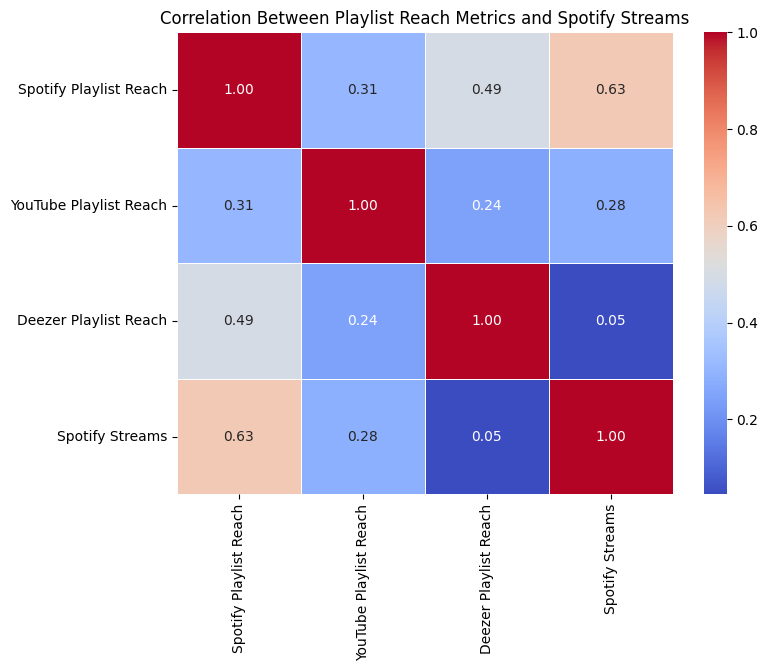

In [171]:
# Select the columns related to playlist reach metrics
playlist_reach_columns = ['Spotify Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach','Spotify Streams']

# Calculate the correlation between these columns
playlist_reach_correlation_matrix = spotify[playlist_reach_columns].corr()

# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(playlist_reach_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Playlist Reach Metrics and Spotify Streams")
plt.show()

Using both *“streams&views”* and *“engagement”* metrics, we’ve seen that **TikTok** does not correlate with the other platforms. This suggests that TikTok may have a different user behavior pattern or engagement model compared to platforms like Spotify, YouTube, and Deezer, indicating that it might not follow the same trends or audience interactions.

Conversely, we’ve seen that **Pandora** and **YouTube** correlate quite positively with **Spotify**, indicating that user behavior and engagement on these platforms may follow similar patterns. This suggests that tracks with high streams or views on Spotify are likely to also perform well on Pandora and YouTube, reflecting a consistent audience across these platforms.

### Songs' popularity as a function of release date

We want to decipher if older songs have higher popularity than newer ones, for instance. We will explore the correlation between the release date and the number of streams, as well as examining the change in song popularity over time.”


In [160]:
# Convert 'Release Date' to datetime
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'], errors='coerce')

# Create a column for the year of release
spotify['Release Year'] = spotify['Release Date'].dt.year

In [163]:
# Calculate correlation between 'Release Year' and 'Spotify Streams'
correlation = spotify[['Release Year', 'Spotify Streams']].corr()

# Display correlation matrix
print(correlation)

                 Release Year  Spotify Streams
Release Year         1.000000        -0.592919
Spotify Streams     -0.592919         1.000000


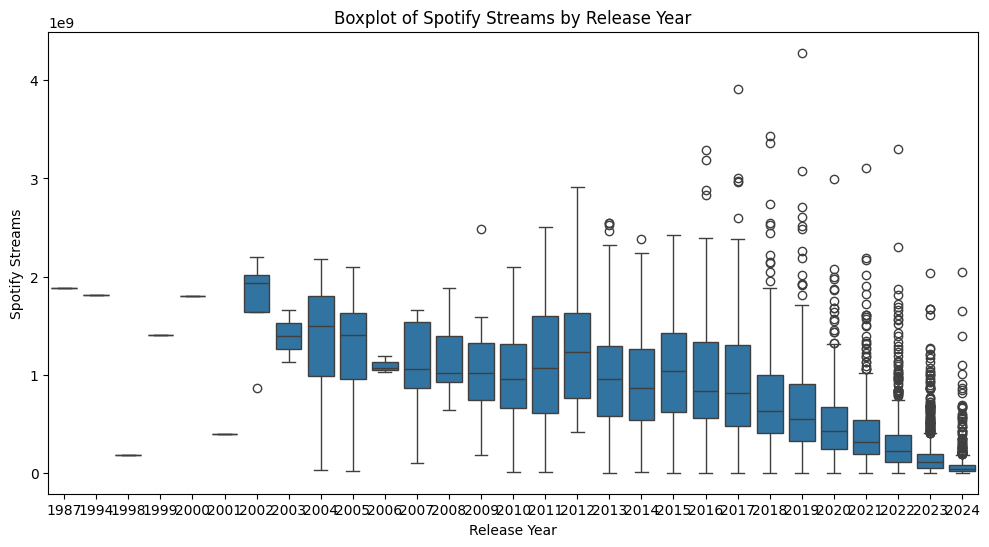

In [161]:
# Boxplot to see the distribution of Spotify Streams by Release Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify, x='Release Year', y='Spotify Streams')
plt.title("Boxplot of Spotify Streams by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Spotify Streams")
plt.show()

Looks like older songs tend to have more Spotify Streams.

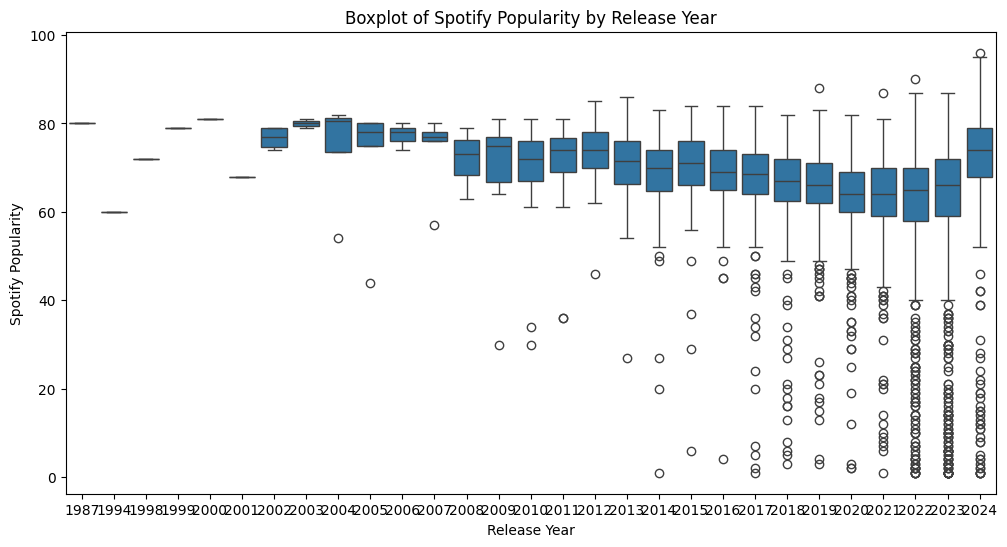

In [164]:
# Boxplot to see the distribution of Spotify Popularity by Release Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify, x='Release Year', y='Spotify Popularity')
plt.title("Boxplot of Spotify Popularity by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Spotify Popularity")
plt.show()

We see something different with popularity, although even slighter tendency.

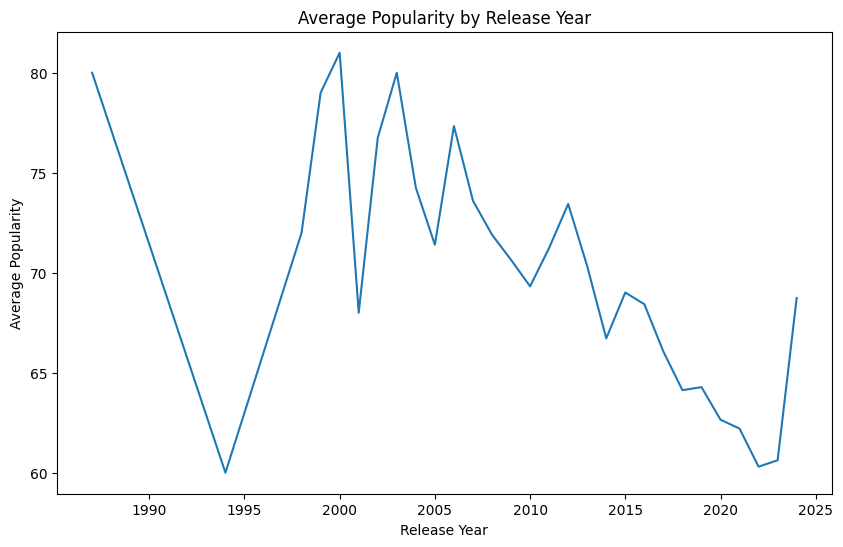

In [157]:
# Check how popularity has changed over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=spotify.groupby('Release Year').agg({'Spotify Popularity': 'mean'}).reset_index(),
             x='Release Year', y='Spotify Popularity')
plt.title("Average Popularity by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()

With this last plot, we see which years yielded the songs with highest popularity.

### Do explicit songs have more popularity?

In [153]:
# First, we filter explicit and non-explicit songs
explicit_songs = spotify[spotify['Explicit Track'] == 1]
non_explicit_songs = spotify[spotify['Explicit Track'] == 0]

# Next, we select the columns to analyze
metrics = ['Spotify Streams', 'Spotify Playlist Reach', 'YouTube Likes', 'TikTok Likes', 'Shazam Counts']

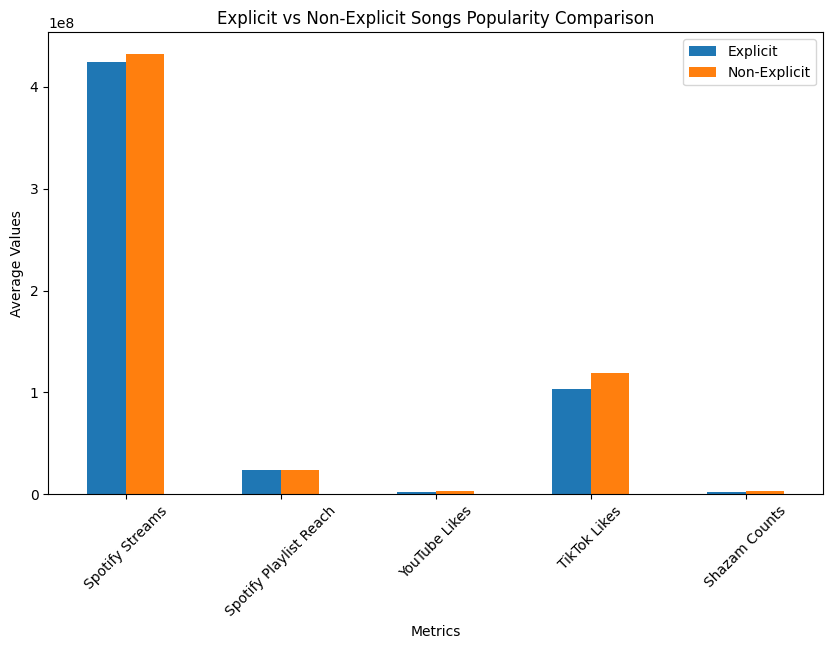

In [154]:
# Calcular la mitjana per cada grup (explícites vs no explícites)
explicit_mean = explicit_songs[metrics].mean()
non_explicit_mean = non_explicit_songs[metrics].mean()

# Crear un DataFrame per comparar les mitjanes
comparison_df = pd.DataFrame({
    'Explicit': explicit_mean,
    'Non-Explicit': non_explicit_mean
})

# Crear un bar plot per comparar les mètriques
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Explicit vs Non-Explicit Songs Popularity Comparison")
plt.xlabel("Metrics")
plt.ylabel("Average Values")
plt.xticks(rotation=45)
plt.show()

Looks like there is no major difference in popularity (Spotify Streams Spotify Playlist Reach, YouTube Likes, TikTok Likes and Shazam Counts) between explicit and non-explicit songs.

### Track Score vs Spotify Popularity

Correlation between Track Score and Spotify Popularity: 0.19343340056853808


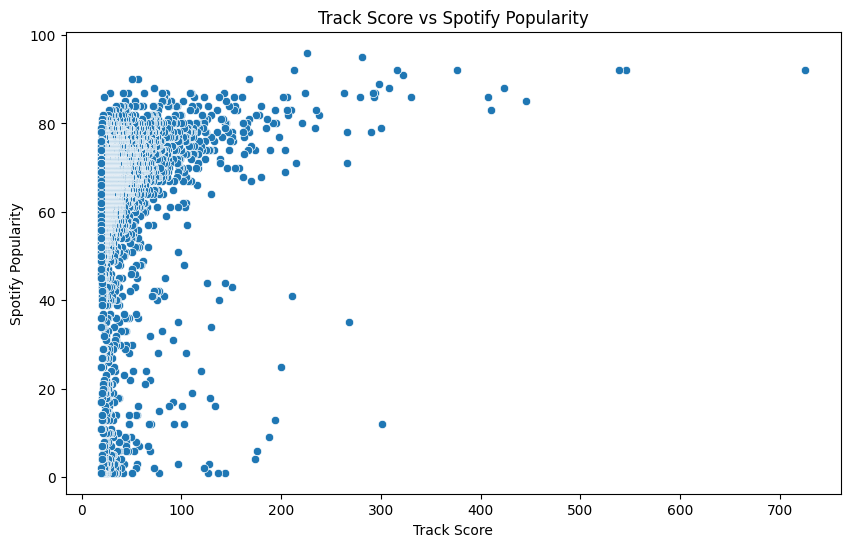

In [155]:
# Calculate the correlation between Track Score and Spotify Popularity
correlation = spotify['Track Score'].corr(spotify['Spotify Popularity'])
print(f"Correlation between Track Score and Spotify Popularity: {correlation}")

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify, x='Track Score', y='Spotify Popularity')
plt.title("Track Score vs Spotify Popularity")
plt.xlabel("Track Score")
plt.ylabel("Spotify Popularity")
plt.show()

Looks like there is a positive correlation, but very minor, much smaller than I expected. I wonder how this "track score" is calculated...

## Summary of EDA

	1.	Top Tracks by Spotify Streams and Popularity: We compared the top 10 tracks based on Spotify streams and Spotify popularity. We found that the top 10 tracks by Spotify streams and Spotify popularity did not match. We then calculated the correlation between these two metrics, which was found to be 0.38.

	2.	Correlation Analysis: Then, we calculated the correlation between spotify popularity and all other numerical metrics.

	3.	Top 50 Artists: We analyzed the top 50 artists according to Spotify popularity. Some artists appeared more than once due to having multiple popular tracks. We analyzed this by looking at both the maximum popularity per artist and the total popularity across all tracks. The differences were visualized using two word clouds.

	4.	Platform Comparison: We compared various platforms (Spotify, Pandora, Soundcloud, YouTube, TikTok) based on:
	- Streams and Views. We observed that Pandora, Soundcloud, and YouTube had a positive correlation with Spotify streams, while TikTok had almost no positive correlation with Spotify.	
	- Engagement Metrics: We analyzed engagement metrics like YouTube likes, TikTok likes, and Shazam counts. We found that TikTok had little to no correlation with Spotify, while YouTube and Shazam counts showed positive correlations with Spotify.
	- Playlist Reach Comparison: We compared Spotify Playlist Reach, YouTube Playlist Reach, and Deezer Playlist Reach. We found that Deezer showed a stronger positive correlation with Spotify than YouTube.

	5.	Popularity by Release Date: We analyzed the relationship between Spotify streams and Spotify popularity over time (based on the release date). Looks like older songs tend to have more streams and slightly more popularity in Spotify. 

	6.	Explicit vs Non-Explicit Songs: We compared the popularity of explicit songs versus non-explicit songs across different metrics, including streams and engagement. No significant difference in popularity was found between explicit and non-explicit songs.

	7.	Track Score vs Popularity: We explored the correlation between the Track Score and Spotify Popularity and found a very weak correlation of 0.19.